In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load in data and display first 5 rows
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

- 2938 rows and 22 columns
- Mostly numerical data with Country and Status listed as strings
- Null values in several columns. Highest number in Populations, GDP, Hepatitis, Income composition of resources, and Schooling

In [4]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Possible routes of exploration:
1. Disease trends by year (Regions vs Global)
    a. Percentage expenditure vs disease trends and GDP per country
    b. Income composition (does higher quality of life == less disease?) vs disease trends
2. Is there a relationship between Schooling and diseases / life expectancy?
3. GDP vs life expectancy
    a. GDP per capita?

*Group by continent, status

In [5]:
# Getting the relevant columns we want to use for our findings
relevant_cols = [
    'Country',
    'Year',
    'Status',
    'Life expectancy',
    'Adult Mortality',
    'under-five deaths',
    'percentage expenditure',
    'GDP',
    'Population',
    'Income composition of resources',
    'Schooling'
]

In [6]:
# creating a new df called df_relevant with relevant cols
# causes an error because our relevant_cols has col names that don't exist
df_relevant = df[relevant_cols]

KeyError: "['Life expectancy', 'under-five deaths'] not in index"

In [17]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [16]:
df.columns.str.strip()

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [19]:
# stripping column names without whitespace
df = df.rename(columns={'Life expectancy ':'Life expectancy', 'under-five deaths ':'under-five deaths'})
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
# now we can create a new df called df_relevant with relevant cols
df_relevant = df[relevant_cols]
df_relevant

,Country,Year,Status,Life expectancy,Adult Mortality,under-five deaths,percentage expenditure,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,83,71.279624,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,86,73.523582,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,89,73.219243,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,93,78.184215,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,97,7.097109,63.537231,2978599.0,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,42,0.000000,454.366654,12777511.0,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,41,0.000000,453.351155,12633897.0,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,40,0.000000,57.348340,125525.0,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,39,0.000000,548.587312,12366165.0,0.427,9.8


In [21]:
df_relevant.describe()

,Year,Life expectancy,Adult Mortality,under-five deaths,percentage expenditure,GDP,Population,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2938.000000,2490.000000,2.286000e+03,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,42.035739,738.251295,7483.158469,1.275338e+07,0.627551,11.992793
std,4.613841,9.523867,124.292079,160.445548,1987.914858,14270.169342,6.101210e+07,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.000000,1.681350,3.400000e+01,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,4.685343,463.935626,1.957932e+05,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,4.000000,64.912906,1766.947595,1.386542e+06,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,28.000000,441.534144,5910.806335,7.420359e+06,0.779000,14.300000
max,2015.000000,89.000000,723.000000,2500.000000,19479.911610,119172.741800,1.293859e+09,0.948000,20.700000


- Wide range between min/max for Life expetancy
- Scientific notation in population
- under-five deaths mean is highly skewed upward (mean = 42; median = 4)
- At least one country that has 0 years of schooling

In [22]:
df_relevant.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [23]:
df_relevant['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

- 193 unique countries with statuses: 'Developed' or 'Developing'

In [24]:
# Feature Engineer column to group countries by Region
# country-by-continent.json src: https://github.com/samayo/country-json/blob/master/src/country-by-continent.json

import json
with open('country-by-continent.json') as file:
    country_continent_converter = json.load(file)

In [25]:
print(country_continent_converter)

[{'country': 'Afghanistan', 'continent': 'Asia'}, {'country': 'Albania', 'continent': 'Europe'}, {'country': 'Algeria', 'continent': 'Africa'}, {'country': 'American Samoa', 'continent': 'Oceania'}, {'country': 'Andorra', 'continent': 'Europe'}, {'country': 'Angola', 'continent': 'Africa'}, {'country': 'Anguilla', 'continent': 'North America'}, {'country': 'Antarctica', 'continent': 'Antarctica'}, {'country': 'Antigua and Barbuda', 'continent': 'North America'}, {'country': 'Argentina', 'continent': 'South America'}, {'country': 'Armenia', 'continent': 'Asia'}, {'country': 'Aruba', 'continent': 'North America'}, {'country': 'Australia', 'continent': 'Oceania'}, {'country': 'Austria', 'continent': 'Europe'}, {'country': 'Azerbaijan', 'continent': 'Asia'}, {'country': 'Bahamas', 'continent': 'North America'}, {'country': 'Bahrain', 'continent': 'Asia'}, {'country': 'Bangladesh', 'continent': 'Asia'}, {'country': 'Barbados', 'continent': 'North America'}, {'country': 'Belarus', 'continent

In [26]:
type(country_continent_converter)

list

In [27]:
country_continent_converter[0]

{'country': 'Afghanistan', 'continent': 'Asia'}

In [28]:
country_continent_converter[0]["country"]

'Afghanistan'

In [29]:
country_continent_converter[0]["continent"]

'Asia'

In [30]:
# writing a for-loop to find the continent related to the country `Afghanistan`
for country_continent_dict in country_continent_converter:
    if 'Afghanistan' == country_continent_dict["country"]:
        print(country_continent_dict["continent"])


Asia


In [45]:
"""
for country in df_relevant['Country']:
    for country_continent_dict in country_continent_converter:
        if country_continent_dict == country_continent_dict["country"]:
            print(country_continent_dict["continent"])
"""

'\nfor country in df_relevant[\'Country\']:\n    for country_continent_dict in country_continent_converter:\n        if country_continent_dict == country_continent_dict["country"]:\n            print(country_continent_dict["continent"])\n'

In [46]:
# df_relevant['continent'] = [continent_dict["continent"] for continent_dict in country_continent_converter if df_relevant['Country'] == continent_dict["country"]][0]

In [47]:
# Create a mapper function to find continents for each country in the dataframe
def fixed_mapper(country_from_df):
    '''
    Takes in the country and outputs the continent of the country or N/A if continent not found
    '''
    for country_continent_dict in country_continent_converter:
        if country_from_df == country_continent_dict["country"]:
            return country_continent_dict["continent"]
        
    # if country_from_df loops through converter and doesn't find a continent
    # then return "N/A"
    return "N/A"
    

In [34]:
# def get_continent(country): 
#        return [continent_dict["continent"] for continent_dict in country_continent_converter if continent_dict["country"] == country] 


# df_relevant['continent_1'] = df_relevant['Country'].apply(get_continent)

In [35]:
# using mapper function to create new column "continent" inside df_relevant
df_relevant["continent"] = df_relevant["Country"].map(fixed_mapper)

/var/folders/8g/m6zcqnnd1p36dhf35mwkv0zw0000gn/T/ipykernel_51777/3065947453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant["continent"] = df_relevant["Country"].map(fixed_mapper)


In [36]:
df_relevant.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,under-five deaths,percentage expenditure,GDP,Population,Income composition of resources,Schooling,continent
0,Afghanistan,2015,Developing,65.0,263.0,83,71.279624,584.259210,33736494.0,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,86,73.523582,612.696514,327582.0,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,89,73.219243,631.744976,31731688.0,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,93,78.184215,669.959000,3696958.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,97,7.097109,63.537231,2978599.0,0.454,9.5,Asia
5,Afghanistan,2010,Developing,58.8,279.0,102,79.679367,553.328940,2883167.0,0.448,9.2,Asia
6,Afghanistan,2009,Developing,58.6,281.0,106,56.762217,445.893298,284331.0,0.434,8.9,Asia
7,Afghanistan,2008,Developing,58.1,287.0,110,25.873925,373.361116,2729431.0,0.433,8.7,Asia
8,Afghanistan,2007,Developing,57.5,295.0,113,10.910156,369.835796,26616792.0,0.415,8.4,Asia
9,Afghanistan,2006,Developing,57.3,295.0,116,17.171518,272.563770,2589345.0,0.405,8.1,Asia


In [37]:
df_relevant['continent'].value_counts()

continent
Africa           784
Asia             624
Europe           546
N/A              368
North America    322
South America    160
Oceania          134
Name: count, dtype: int64

In [38]:
# Finding all countries where continent wasn't found
test = df_relevant.loc[df_relevant['continent'] == 'N/A']
test['Country'].unique()

array(['Bolivia (Plurinational State of)', 'Brunei Darussalam',
       "Côte d'Ivoire", 'Cabo Verde', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Fiji',
       'Iran (Islamic Republic of)', "Lao People's Democratic Republic",
       'Micronesia (Federated States of)', 'Republic of Korea',
       'Republic of Moldova', 'Russian Federation', 'Swaziland',
       'Syrian Arab Republic',
       'The former Yugoslav republic of Macedonia', 'Timor-Leste',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam'], dtype=object)

In [39]:
# mapping country names to the country names related to country-by-continent.json dictionary

relabel_countries = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Brunei Darussalam': 'Brunei',
       "Côte d'Ivoire": 'Ivory Coast',
       'Cabo Verde': 'Cape Verde',
       'Czechia': 'Czech Republic',
       "Democratic People's Republic of Korea": 'North Korea',
       'Democratic Republic of the Congo': 'The Democratic Republic of Congo',
       'Fiji': 'Fiji Islands',
       'Iran (Islamic Republic of)': 'Iran',
       "Lao People's Democratic Republic": 'Laos',
       'Micronesia (Federated States of)': 'Micronesia, Federated States of',
       'Republic of Korea': 'South Korea',
       'Republic of Moldova': 'Moldova',
       'Russian Federation': 'Russia',
       'Swaziland': 'Eswatini',
       'Syrian Arab Republic': 'Syria',
       'The former Yugoslav republic of Macedonia': 'North Macedonia',
       'Timor-Leste': 'East Timor',
       'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
       'United Republic of Tanzania': 'Tanzania',
       'United States of America': 'United States',
       'Venezuela (Bolivarian Republic of)': 'Venezuela',
       'Viet Nam': 'Vietnam'
}

In [40]:
# Using a .replace to replace relevant country names
df_relevant['Country'] = df_relevant['Country'].replace(relabel_countries)

/var/folders/8g/m6zcqnnd1p36dhf35mwkv0zw0000gn/T/ipykernel_51777/852530127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Country'] = df_relevant['Country'].replace(relabel_countries)


In [41]:
# Checking that relevant country names were changed
test = df_relevant.loc[df_relevant['continent'] == 'N/A']
test['Country'].unique()

array(['Bolivia', 'Brunei', 'Ivory Coast', 'Cape Verde', 'Czech Republic',
       'North Korea', 'The Democratic Republic of Congo', 'Fiji Islands',
       'Iran', 'Laos', 'Micronesia, Federated States of', 'South Korea',
       'Moldova', 'Russia', 'Eswatini', 'Syria', 'North Macedonia',
       'East Timor', 'United Kingdom', 'Tanzania', 'United States',
       'Venezuela', 'Vietnam'], dtype=object)

In [42]:
# Finding continents again
df_relevant["continent"] = df_relevant["Country"].map(fixed_mapper)

/var/folders/8g/m6zcqnnd1p36dhf35mwkv0zw0000gn/T/ipykernel_51777/3065947453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant["continent"] = df_relevant["Country"].map(fixed_mapper)


In [43]:
# yay! all continents are found
test = df_relevant.loc[df_relevant['continent'] == 'N/A']
test['Country'].unique()

array([], dtype=object)

In [44]:
df_relevant.head()

,Country,Year,Status,Life expectancy,Adult Mortality,under-five deaths,percentage expenditure,GDP,Population,Income composition of resources,Schooling,continent
0,Afghanistan,2015,Developing,65.0,263.0,83,71.279624,584.259210,33736494.0,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,86,73.523582,612.696514,327582.0,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,89,73.219243,631.744976,31731688.0,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,93,78.184215,669.959000,3696958.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,97,7.097109,63.537231,2978599.0,0.454,9.5,Asia


In [54]:
df_relevant.loc[df_relevant["GDP"].isna()]["Country"].unique()

array(['Bahamas', 'Bolivia', 'Ivory Coast', 'Congo', 'Cook Islands',
       'Czech Republic', 'North Korea',
       'The Democratic Republic of Congo', 'Egypt', 'Eritrea', 'Gambia',
       'Iran', 'Iraq', 'Kyrgyzstan', 'Laos', 'Libya',
       'Micronesia, Federated States of', 'Monaco', 'Niue',
       'Papua New Guinea', 'South Korea', 'Moldova',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Slovakia', 'Somalia', 'South Sudan',
       'Syria', 'North Macedonia', 'United Kingdom', 'Tanzania',
       'United States', 'Venezuela', 'Vietnam', 'Yemen'], dtype=object)

In [56]:
df_relevant.loc[df_relevant["Population"].isna()]["Country"].unique()

array(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Bolivia',
       'Brunei', 'Ivory Coast', 'Congo', 'Cook Islands', 'Cuba',
       'Czech Republic', 'North Korea',
       'The Democratic Republic of Congo', 'Dominica', 'Egypt', 'Eritrea',
       'Gambia', 'Grenada', 'Iran', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Libya', 'Marshall Islands', 'Micronesia, Federated States of',
       'Monaco', 'Nauru', 'New Zealand', 'Niue', 'Oman', 'Qatar',
       'South Korea', 'Moldova', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia',
       'Singapore', 'Slovakia', 'Somalia', 'North Macedonia',
       'United Arab Emirates', 'United Kingdom', 'Tanzania',
       'United States', 'Venezuela', 'Vietnam', 'Yemen'], dtype=object)

In [57]:
df_relevant["Year"].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [83]:
years = df_relevant["Year"].unique()
continents = df_relevant["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [92]:
# group by year and continent, get the sum of under-five deaths
under_five_deaths_by_cont_year = df_relevant.groupby(by=["continent", "Year"])["under-five deaths"].sum()
under_five_deaths_by_cont_year

continent      Year
Africa         2000    4292
               2001    4232
               2002    4154
               2003    4071
               2004    3984
                       ... 
South America  2011     129
               2012     123
               2013     120
               2014     113
               2015     111
Name: under-five deaths, Length: 96, dtype: int64

In [ ]:
"""
# getting y_axis for Africa under 5 deaths per year
y_axis_africa = []
for year in years:
    y_axis_africa.append(under_five_deaths_by_cont_year["Africa"][year])

# getting y_axis for Asia under 5 deaths per year
y_axis_asia = []
for year in years:
    y_axis_asia.append(under_five_deaths_by_cont_year["Asia"][year])
"""

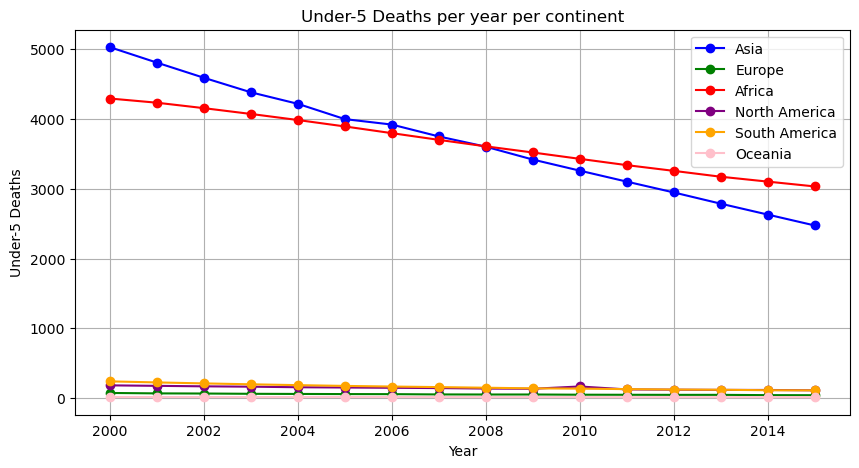

In [98]:
# Under-5 deaths per year by continent
# x-axis: year
# y-axis: under 5 deaths
# each continent would have its own line in the graph
# FOR TABLEAU: Under-5 deaths by continent + status

fig, ax = plt.subplots(figsize=(10, 5))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']

for i, continent in enumerate(continents):
    # for every continent, get the under five deaths for every year
    under_five_deaths_per_continent = [under_five_deaths_by_cont_year[continent][year] for year in years]

    # plot under five deaths for that continent
    ax.plot(years, under_five_deaths_per_continent, label=continent, color=colors[i], linestyle='-', marker='o')


ax.set_title('Under-5 Deaths per year per continent')
ax.set_xlabel('Year')
ax.set_ylabel('Under-5 Deaths')
ax.legend()
ax.grid(True)
plt.show()

In [99]:
# Manual way

"""
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(years, y_axis_africa, label='Africa', color='blue', linestyle='-', marker='o')
ax.plot(years, y_axis_asia, label='Asia', color='red', linestyle='-', marker='o')
ax.set_title('Line Plot')
ax.set_xlabel('Year')
ax.set_ylabel('Under-5 Deaths')
ax.legend()
ax.grid(True)
plt.show()
"""

"\nfig, ax = plt.subplots(figsize=(10, 5))\nax.plot(years, y_axis_africa, label='Africa', color='blue', linestyle='-', marker='o')\nax.plot(years, y_axis_asia, label='Asia', color='red', linestyle='-', marker='o')\nax.set_title('Line Plot')\nax.set_xlabel('Year')\nax.set_ylabel('Under-5 Deaths')\nax.legend()\nax.grid(True)\nplt.show()\n"

In [ ]:
# next step: basically do the same thing but for adult mortality rates